<a href="https://colab.research.google.com/github/suryasrijajamalapuram/EV-Range-Predictor/blob/main/EV_Range_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# Display first 5 rows of training data
print("Training Data Sample:")
train_df.head()

# Display first 5 rows of test data
print("\nTest Data Sample:")
test_df.head()

Training Data Sample:

Test Data Sample:


,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,EV28368,JN1AZ0CP5C,Jefferson,PORT TOWNSEND,WA,98368.0,2012.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,24.0,268953807,POINT (-122.818016 48.080229),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...
1,EV27088,1FTFW1ED1M,King,ISSAQUAH,WA,98029.0,2021.0,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,179767045,POINT (-122.014191 47.559121),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,EV58989,5YJ3E1EB9J,Pierce,PUYALLUP,WA,98372.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,25.0,176535187,POINT (-122.270761 47.205558),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,EV6715,5YJ3E1EB0M,Pierce,TACOMA,WA,98403.0,2021.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,176282816,POINT (-122.459716 47.265523),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
4,EV63251,5YJYGDEF1M,Kitsap,BREMERTON,WA,98312.0,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,161607316,POINT (-122.724682 47.57271),PUGET SOUND ENERGY INC


In [3]:
# Select features
features = ['Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Base MSRP']
target = 'Electric Range'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Display first 5 rows of X_train
X_train.head()

,Model Year,Make,Model,Electric Vehicle Type,Base MSRP
0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),0
1,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),0
2,2015.0,BMW,I3,Battery Electric Vehicle (BEV),0
3,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),0
4,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),0


In [4]:
# Identify categorical columns
categorical_cols = ['Make', 'Model', 'Electric Vehicle Type']

# Apply one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

# Align train and test columns (in case some categories are missing in test)
X_test_encoded = X_test_encoded.reindex(columns = X_train_encoded.columns, fill_value=0)

# Display first 5 rows after encoding
X_train_encoded.head()

,Model Year,Base MSRP,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,...,Model_X5,Model_XC40,Model_XC60,Model_XC60 AWD,Model_XC60 AWD PHEV,Model_XC90,Model_XC90 AWD,Model_XC90 AWD PHEV,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)
0,2020.0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2011.0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2015.0,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2013.0,0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2019.0,0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_encoded, y_train)

# Make predictions on test set
y_pred = rf_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest EV Range Prediction - Mean Squared Error: {mse:.2f}")
print(f"Random Forest EV Range Prediction - R-squared Score: {r2:.2f}")

Random Forest EV Range Prediction - Mean Squared Error: 95.81
Random Forest EV Range Prediction - R-squared Score: 0.99


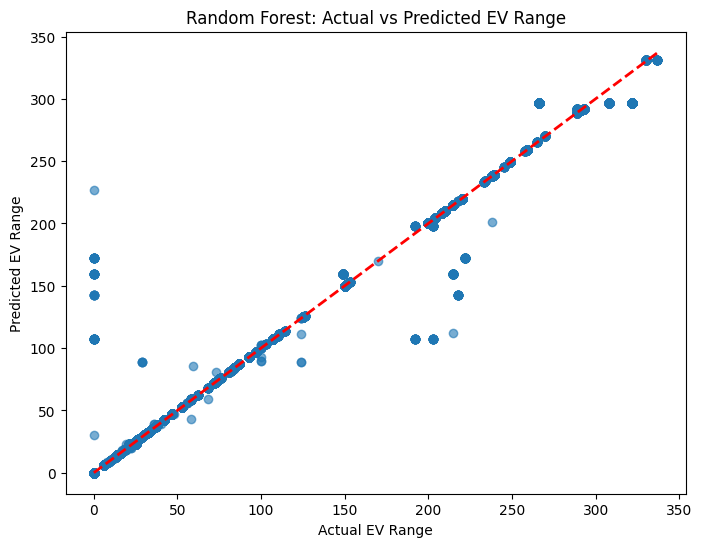

In [6]:
import matplotlib.pyplot as plt

# Plot predicted vs actual EV range
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual EV Range")
plt.ylabel("Predicted EV Range")
plt.title("Random Forest: Actual vs Predicted EV Range")
plt.show()

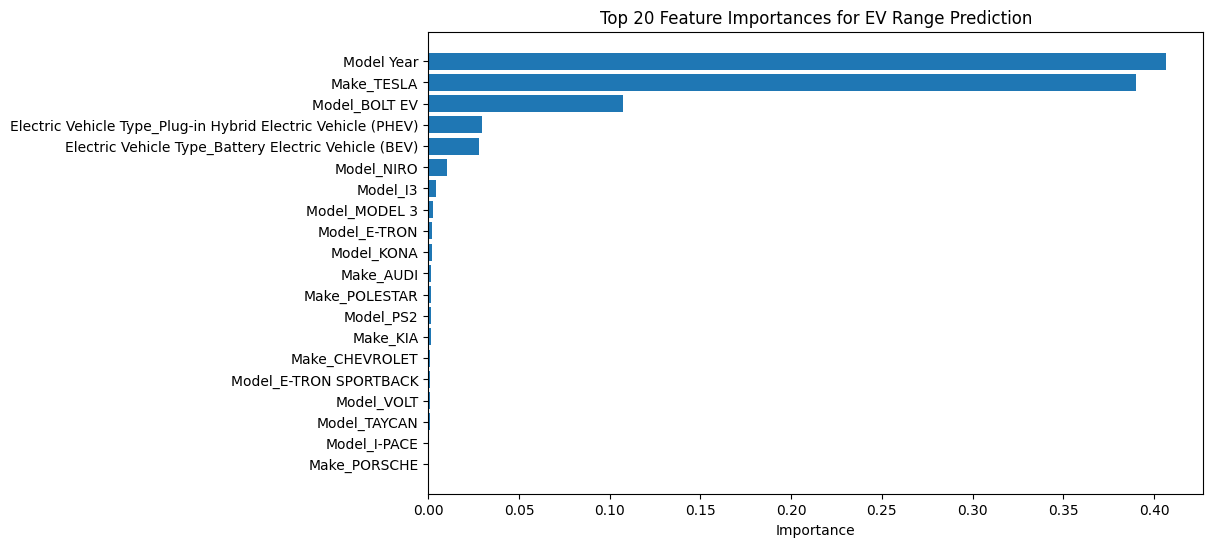

In [7]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train_encoded.columns

# Create a DataFrame
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot top 20 important features
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances for EV Range Prediction")
plt.show()

In [8]:
def predict_ev_range(model_year, make, model, ev_type, base_msrp, rf_model, X_train_encoded):
    """
    Predict EV range for a new vehicle using the trained Random Forest model.

    Parameters:
    - model_year: int or float
    - make: str
    - model: str
    - ev_type: str ("Battery Electric Vehicle (BEV)" or "Plug-in Hybrid Electric Vehicle (PHEV)")
    - base_msrp: float
    - rf_model: trained RandomForestRegressor
    - X_train_encoded: original encoded training features (for one-hot alignment)

    Returns:
    - predicted_range: float
    """
    import pandas as pd

    # Create a single-row DataFrame
    input_df = pd.DataFrame({
        'Model Year': [model_year],
        'Base MSRP': [base_msrp],
        'Make': [make],
        'Model': [model],
        'Electric Vehicle Type': [ev_type]
    })

    # One-hot encode categorical features
    input_encoded = pd.get_dummies(input_df, columns=['Make','Model','Electric Vehicle Type'])

    # Align columns with training set
    input_encoded = input_encoded.reindex(columns = X_train_encoded.columns, fill_value=0)

    # Predict range
    predicted_range = rf_model.predict(input_encoded)[0]

    return predicted_range

In [9]:
predicted = predict_ev_range(
    model_year=2022,
    make='TESLA',
    model='MODEL Y',
    ev_type='Battery Electric Vehicle (BEV)',
    base_msrp=60000,
    rf_model=rf_model,
    X_train_encoded=X_train_encoded
)

print(f"Predicted EV Range: {predicted:.2f} miles")

Predicted EV Range: 16.64 miles
